# 02-井筒温度

nt = 1

nt = 2

nt = 3

nt = 4

nt = 5

nt = 6

nt = 7

nt = 8

nt = 9

nt = 10

nt = 11

nt = 12

nt = 13

nt = 14

nt = 15

nt = 16

nt = 17

nt = 18

nt = 19

nt = 20

nt = 21

nt = 22

nt = 23

nt = 24

nt = 25

nt = 26

nt = 27

nt = 28

nt = 29

nt = 30

nt = 31

nt = 32

nt = 33

nt = 34

nt = 35

nt = 36

nt = 37

nt = 38

nt = 39

nt = 40

nt = 41

nt = 42

nt = 43

nt = 44

nt = 45

nt = 46

nt = 47

nt = 48

nt = 49

nt = 50

nt = 51

nt = 52

nt = 53

nt = 54

nt = 55

nt = 56

nt = 57

nt = 58

nt = 59

nt = 60

nt = 61

nt = 62

nt = 63

nt = 64

nt = 65

nt = 66

nt = 67

nt = 68

nt = 69

nt = 70

nt = 71

nt = 72

nt = 73

nt = 74

nt = 75

nt = 76

nt = 77

nt = 78

nt = 79

nt = 80

nt = 81

nt = 82

nt = 83

nt = 84

nt = 85

nt = 86

nt = 87

nt = 88

nt = 89

nt = 90

nt = 91

nt = 92

nt = 93

nt = 94

nt = 95

nt = 96

nt = 97

nt = 98

nt = 99

nt = 100

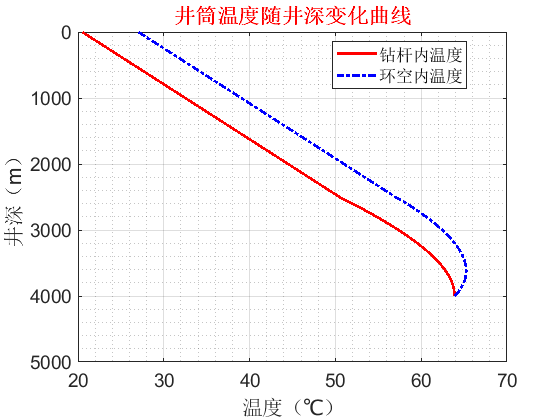

ans = 63.8813

ans = 27.0244

历时 3.768747 秒。


In [1]:
clear all;clc;close all
cd("D:\桌面\毕设\材料\20221127-结题材料\03-源代码\03 - 井筒温度（更新新的）")
tic;

delta_t=3600;           % 时间步长，s
timesteps=100;          % 循环次数，即总模拟时间为delta_t×timesteps

welldepth=4005;         % 井深，m
dz=41;                  % 以dz为主要的网格单元长度，m

casing_number=3;        % 套管层数（即表层、技术和生产套管层数，不包括尾管）

Depth_weiguan=2505;     % 尾管悬挂深度，m

% weiguan=0;              % 不存在尾管，则环空温度只有一个径向层
weiguan=1;              % 存在尾管，则需将环空温度场分为三个径向层

Rheology_type=1;        % 1为牛顿流体，2为幂律流体，3为宾汉流体，4为赫巴流体
% Rheology_type=2;        % 1为牛顿流体，2为幂律流体，3为宾汉流体，4为赫巴流体
% Rheology_type=3;        % 1为牛顿流体，2为幂律流体，3为宾汉流体，4为赫巴流体
% Rheology_type=4;        % 1为牛顿流体，2为幂律流体，3为宾汉流体，4为赫巴流体

%% 井身结构处理及网格划分
nobox_r=200;    % 径向网格单元数

for i=1:casing_number   % 套管序号，序号从内向外增加，即casing_number=1为生产套管
    Depth_casing(i)=welldepth-4000/4*i+5;     % 套管下深，m
    if i==casing_number                     % 最外层套管（表层套管）
        Depth_fluid(i)=0;                   % 表层套管水泥返深，m（一般返至地面）
    else
        Depth_fluid(i)=Depth_casing(i)-195; % 非表层套管水泥返深，m（一般返至密封点以上50~200米）
    end
end

%% 是否存在尾管，存在尾管和不存在尾管的系数矩阵计算差别很大，因此使用不同的模型
if weiguan==0
    section_number=casing_number+1;             % 井段数=套管层数+1，沿井深分段，每一段以dz为主要网格单元长度划分网格，序号从井底向井口增加
    if casing_number==0                         % 如果套管层数=0，即裸眼井，则井段数为1
        section_length1(1)=welldepth;           % 这一井段的段长为井深，m
    else
        for i=1:section_number
            if i==1
                section_length1(i)=welldepth-Depth_casing(i);
            elseif i==section_number
                section_length1(i)=Depth_casing(i-1);
            else
                section_length1(i)=Depth_casing(i-1)-Depth_casing(i);
            end
        end
    end
else
    section_number=casing_number+2;             % 井段数=套管层数+2，沿井深分段，每一段以dz为主要网格单元长度划分网格，序号从井底向井口增加
    if casing_number==0
        fprintf('尾管存在的时候必须存在套管，即套管数>=1')
    elseif casing_number==1
        section_length1(1)=welldepth-Depth_casing(1);
        section_length1(2)=Depth_casing(1)-Depth_weiguan;
        section_length1(3)=Depth_weiguan;
    elseif casing_number==2
        section_length1(1)=welldepth-Depth_casing(1);
        section_length1(2)=Depth_casing(1)-Depth_weiguan;
        section_length1(3)=Depth_weiguan-Depth_casing(2);
        section_length1(4)=Depth_casing(2);
    else
        for i=1:section_number
            if i==1
                section_length1(1)=welldepth-Depth_casing(1);
            elseif i==2
                section_length1(2)=Depth_casing(1)-Depth_weiguan;
            elseif i==3
                section_length1(3)=Depth_weiguan-Depth_casing(2);
            elseif i==section_number
                section_length1(i)=Depth_casing(i-2);
            else
                section_length1(i)=Depth_casing(i-2)-Depth_casing(i-1);
            end
        end      
    end
end

section_length1(find(section_length1==0))=[];   % 去除向量中的0元素，对于段长为0的不能作为一段划分网格
section_length=section_length1(end:-1:1);       % 将段长向量逆序，即序号从井口向井底增加
section_number=length(section_length);          % 由于可能去除了向量中的0元素，需重新计算段长数

for i=1:section_number
    n(i)=floor(section_length(i)/dz);           % 计算每一段中被dz整除数
    m(i)=mod(section_length(i),dz);             % 计算每一段中被dz整除后的余数
end

delta_z=[];                                     % 总的网格单元长度向量
for i=1:section_number
    int1=[];                                    % 各段的网格单元长度向量
    int1(1:n(i))=dz;                            % 该段n(i)个dz整除项
    if m(i)==0
        int1=int1;                              % 如果余数为0，则表明被整除，则余数的0不被计入到网格单元长度向量
    else
        int1=[int1,m(i)];                       % 如果余数不为0，则表明没被整除，则余数计入到网格单元长度向量
    end
    delta_z=[delta_z,int1];                     % 将这一段的网格单元长度向量与上一段的网格单元长度拼接在一起
end

nobox_z=length(delta_z)+1;                      % 网格边界数=网格数+1

Depth=zeros(nobox_z,1);                         % 井深向量，m
Depth(1)=0;                                     % 井口深度，m
for i=2:nobox_z
    Depth(i)=Depth(i-1)+delta_z(i-1);
end

Weiguan_i=find(Depth==Depth_weiguan);           % 判断尾管对应的节点数

%% 网格参数赋值
[rou_m,Cpm,lambdam]=deal(1750,1600,1.75);       % 钻井液的密度（kg/m^3）、比热容（J/(kg·℃））、导热系数（W/(m·℃））
[rou_s,Cps,lambdas]=deal(8000,400,43.75);       % 钢材（钻杆或套管）的密度（kg/m^3）、比热容（J/(kg·℃））、导热系数（W/(m·℃））
[rou_f,Cpf,lambdaf]=deal(2640,800,2.25);        % 地层的密度（kg/m^3）、比热容（J/(kg·℃））、导热系数（W/(m·℃））
[rou_c,Cpc,lambdac]=deal(2140,2000,0.7);        % 水泥的密度（kg/m^3）、比热容（J/(kg·℃））、导热系数（W/(m·℃））

Tm0=20;         % 钻井液注入温度，℃
Tf0=15;         % 地表温度，℃
Tfg=0.0223;     % 地温梯度，℃/m

r=zeros(nobox_z,nobox_r+1);     % 半径矩阵（沿井深和径向两个方向）

if weiguan==0   % 不存在尾管
    r(:,1)=0.0943/2;                % 钻杆内壁半径，m
    r(:,2)=0.1143/2;                % 钻杆外壁半径，m
    r(:,3)=0.1651/2;                % 井筒内壁半径，m
    r(:,4)=0.1851/2;                % 径向第4层外壁半径，m
    r(:,5)=0.2051/2;                % 径向第5层外壁半径，m
    r(:,6)=0.2251/2;                % 径向第6层外壁半径，m
    r(:,7)=0.2451/2;                % 径向第7层外壁半径，m
    r(:,8)=0.2651/2;                % 径向第8层外壁半径，m
    r(:,9)=0.2851/2;                % 径向第9层外壁半径，m

    for i=10:nobox_r+1
        delta_r(:,i)=0.02;              % 径向第i层与第i-1层之间的半径差，m
        r(:,i)=r(:,i-1)+delta_r(:,i);   % 径向第i层外壁半径，m
    end
                 
    A_annulus=pi*(r(:,3).^2-r(:,2).^2);     % 环空内截面积，m^2
else    % 存在尾管
    r(:,1)=0.0943/2;        % 钻杆内壁半径，m
    r(:,2)=0.1143/2;        % 钻杆外壁半径，m
    r(:,3)=0.1451/2;        % 尾管内壁半径，m
    r(:,4)=0.1551/2;        % 尾管水泥环内壁半径，m
    r(:,5)=0.1651/2;        % 环空半径，m
    r(:,6)=0.1851/2;        % 油层套管外壁半径，m
    r(:,7)=0.2051/2;        % 技术套管内壁半径，m
    r(:,8)=0.2251/2;        % 技术套管外壁半径，m
    r(:,9)=0.2451/2;        % 表层套管内壁半径，m
    r(:,10)=0.2651/2;       % 表层套管外壁半径，m
    r(:,11)=0.2851/2;       % 表层水泥环外壁半径，m
    
    for i=12:nobox_r+1
        delta_r(:,i)=0.02;  % 径向第i层与第i-1层之间的半径差，m
        r(:,i)=r(:,i-1)+delta_r(:,i);   % 径向第i层外壁半径，m
    end
    
    A_annulus=zeros(nobox_z,1);     % 计算环空内截面积，m^2
    for j=1:nobox_z
        if Depth(j)<Depth_weiguan
            A_annulus(j)=pi*(r(j,5)^2-r(j,2)^2);
        else
            A_annulus(j)=pi*(r(j,3)^2-r(j,2)^2);
        end
        
    end
end

A_drillpipe=pi*r(:,1).^2;       % 计算钻杆内截面积，m^2

q=0.55/60;                      % 钻井液排量，m^3/s

V_drillpipe=q./A_drillpipe;             % 钻杆内钻井液流速，m/s
V_annulus=q./A_annulus;                 % 环空内钻井液流速，m/s

if Rheology_type==1
    miu_m=0.07;     % 钻井液黏度，Pa·s
    miu_drillpipe(1:nobox_z,1)=miu_m;       % 钻杆内钻井液黏度，Pa·s
    miu_annulus(1:nobox_z,1)=miu_m;         % 环空内钻井液黏度，Pa·s
elseif Rheology_type==2
    K_power=0.8;    % 幂律流体稠度系数,Pa·s^n
    n_power=0.6;    % 幂律流体流性指数
    K_drillpipe(1:nobox_z,1)=K_power;
    n_drillpipe(1:nobox_z,1)=n_power;
    miu_drillpipe(1:nobox_z,1)=1/2*1022^n_power*K_power/0.511/1000;
    miu_annulus=miu_drillpipe;
elseif Rheology_type==3
    tao_y=7.1;      % 宾汉流体屈服应力，Pa
    mu_p=0.02;      % 宾汉流体塑性黏度，Pa·s
    miu_drillpipe(1:nobox_z,1)=mu_p;       % 钻杆内钻井液黏度，Pa·s
    miu_annulus(1:nobox_z,1)=mu_p;         % 环空内钻井液黏度，Pa·s
elseif Rheology_type==4
    tao_y=4.6;      % 赫巴流体屈服应力，Pa
    K_hb=0.34;      % 赫巴流体稠度系数,Pa·s^n    
    n_hb=0.63;      % 赫巴流体流性指数
    K_drillpipe(1:nobox_z,1)=K_hb;
    n_drillpipe(1:nobox_z,1)=n_hb;
    miu_drillpipe(1:nobox_z,1)=1/2*1022^n_hb*K_hb/0.511/1000;
    miu_annulus=miu_drillpipe;
end

Rho=zeros(nobox_z,nobox_r);             % 密度矩阵（沿井深和径向方向）
Cp=zeros(nobox_z,nobox_r);              % 比热容矩阵（沿井深和径向方向）
lambda=zeros(nobox_z,nobox_r+1);        % 导热系数矩阵（沿井深和径向方向）

Rho(:,1)=rou_m;                         % 第一层的密度
Cp(:,1)=Cpm;                            % 第一层的比热容
lambda(:,1)=lambdam;                    % 第一层的导热系数

Rho(:,2)=rou_s;                         % 第二层的密度
Cp(:,2)=Cps;                            % 第二层的比热容
lambda(:,2)=lambdas;                    % 第二层的导热系数

Rho(:,3)=rou_m;                         % 第三层的密度
Cp(:,3)=Cpm;                            % 第三层的比热容
lambda(:,3)=lambdam;                    % 第三层的导热系数

lambda(:,nobox_r+1)=lambdaf;        % 在计算最后一层地层的温度时，需要用到nobox_r+1的导热系数

if weiguan==0           % 不存在尾管

    if casing_number==0                     % 裸眼井，则第4层及之后的层数均为地层
        Rho(:,4:nobox_r)=rou_f;             % 4层及之后的地层密度
        Cp(:,4:nobox_r)=Cpf;                % 4层及之后的地层比热容
        lambda(:,4:nobox_r)=lambdaf;        % 4层及之后的地层导热系数
    else
        for i=1:casing_number
            for j=1:nobox_z
                if Depth(j)<Depth_casing(i) % 小于套管下深，则赋值为套管参数
                    Rho(j,3+2*i-1)=rou_s;       % 密度
                    Cp(j,3+2*i-1)=Cps;          % 比热容
                    lambda(j,3+2*i-1)=lambdas;  % 导热系数
                elseif Depth(j)>=Depth_casing(i) & Depth(j)<=welldepth  % 大于套管下深，则赋值为地层参数
                    Rho(j,3+2*i-1)=rou_f;       % 密度
                    Cp(j,3+2*i-1)=Cpf;          % 比热容
                    lambda(j,3+2*i-1)=lambdaf;  % 导热系数
                end

                if Depth(j)<Depth_fluid(i)  % 小于水泥环返深，则赋值为钻井液参数
                    Rho(j,3+2*i)=rou_m;         % 密度
                    Cp(j,3+2*i)=Cpm;            % 比热容
                    lambda(j,3+2*i)=lambdam;    % 导热系数
                elseif Depth(j)>=Depth_fluid(i) & Depth(j)<Depth_casing(i)  % 大于水泥返深且小于套管下深，则赋值为水泥参数
                    Rho(j,3+2*i)=rou_c;         % 密度
                    Cp(j,3+2*i)=Cpc;            % 比热容
                    lambda(j,3+2*i)=lambdac;    % 导热系数
                elseif Depth(j)>=Depth_casing(i) & Depth(j)<=welldepth      % 大于套管下深，则赋值为地层参数
                    Rho(j,3+2*i)=rou_f;         % 密度
                    Cp(j,3+2*i)=Cpf;            % 比热容
                    lambda(j,3+2*i)=lambdaf;    % 导热系数
                end
            end
        end
    end
    for i=3+2*casing_number+1:nobox_r   % 除去套管和水泥，剩余的径向层全部赋值为地层参数
        for j=1:nobox_z
            Rho(j,i)=rou_f;             % 密度
            Cp(j,i)=Cpf;                % 比热容
            lambda(j,i)=lambdaf;        % 导热系数
        end
    end

    if Rheology_type==1
        Re_drillpipe=Rho(:,1).*V_drillpipe.*(2*r(:,1))./miu_m;                  % 钻杆内雷诺数
        Re_annulus=Rho(:,3).*V_annulus.*(2*(r(:,3)-r(:,2)))/miu_m;              % 环空内雷诺数
        h_drillpipe=0.027.*lambda(:,1).*Re_drillpipe.^0.8.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^0.4./(2*r(:,1))/5;        % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）   
        h_annulus=0.027*lambda(:,3).*Re_annulus.^0.8.*(miu_drillpipe.*Cp(:,3)./lambda(:,3)).^0.4./(2*(r(:,3)-r(:,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
        h1=h_drillpipe;                                                                                                     % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）    
        h2=h_annulus;                                                                                                       % 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
        h3=h_annulus;                                                                                                       % 钻井液与井筒内壁对流换热系数，W/(m^2·℃）
    elseif Rheology_type==2
       Re_drillpipe=Rho(:,1).*V_drillpipe.^(2-n_power).*(2*r(:,1)).^n_power./(8^(n_power-1).*K_power.*((1+3*n_power)./(4*n_power)).^n_power);                  % 钻杆内雷诺数
        delta_correct=(3*n_power+1)/(4*n_power);
        h_drillpipe=0.091*Re_drillpipe.^0.87.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^(1/3)*delta_correct./(2*r(:,1))/5;
        Re_annulus=zeros(nobox_z,1);
        h_annulus=zeros(nobox_z,1);
        for j=1:nobox_z
            if Depth(j)<Depth_weiguan
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_power)*(2*(r(j,5)-r(j,2)))^n_power/(8^(n_power-1)*K_power*((1+3*n_power)/(4*n_power))^n_power);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,5)-r(j,2)))/5;  % 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            else
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_power)*(2*(r(j,3)-r(j,2)))^n_power/(8^(n_power-1)*K_power*((1+3*n_power)/(4*n_power))^n_power);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,3)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            end
        end
    elseif Rheology_type==3
        Re_drillpipe=Rho(:,1).*V_drillpipe.*(2*r(:,1))./mu_p;                  % 钻杆内雷诺数
        Re_annulus=Rho(:,3).*V_annulus.*(2*(r(:,3)-r(:,2)))/mu_p;              % 环空内雷诺数
        h_drillpipe=0.027.*lambda(:,1).*Re_drillpipe.^0.8.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^0.4./(2*r(:,1))/5;        % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）   
        h_annulus=0.027*lambda(:,3).*Re_annulus.^0.8.*(miu_drillpipe.*Cp(:,3)./lambda(:,3)).^0.4./(2*(r(:,3)-r(:,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
        h1=h_drillpipe;                                                                                                     % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）    
        h2=h_annulus;                                                                                                       % 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
        h3=h_annulus;  
    elseif Rheology_type==4
        Re_drillpipe=Rho(:,1).*V_drillpipe.^(2-n_hb).*(2*r(:,1)).^n_hb./(8^(n_power-1).*K_hb.*((1+3*n_hb)./(4*n_hb)).^n_hb);                  % 钻杆内雷诺数
        delta_correct=(3*n_hb+1)/(4*n_hb);
        h_drillpipe=0.091*Re_drillpipe.^0.87.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^(1/3)*delta_correct./(2*r(:,1))/5;
        Re_annulus=zeros(nobox_z,1);
        h_annulus=zeros(nobox_z,1);
        for j=1:nobox_z
            if Depth(j)<Depth_weiguan
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_hb)*(2*(r(j,5)-r(j,2)))^n_hb/(8^(n_hb-1)*K_hb*((1+3*n_hb)/(4*n_hb))^n_hb);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,5)-r(j,2)))/5;  % 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            else
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_hb)*(2*(r(j,3)-r(j,2)))^n_hb/(8^(n_hb-1)*K_hb*((1+3*n_hb)/(4*n_hb))^n_hb);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,3)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            end
        end
    end
    
    h1=h_drillpipe;                                                                                                     % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）    
    h2=h_annulus;                                                                                                       % 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
    h3=h_annulus;                                                                                                       % 钻井液与井筒内壁对流换热系数，W/(m^2·℃）
    
    %% 系数矩阵计算
    A=zeros(nobox_z,nobox_r);   % 系数矩阵A
    B=zeros(nobox_z,nobox_r);   % 系数矩阵B
    C=zeros(nobox_z,nobox_r);   % 系数矩阵C
    D=zeros(nobox_z,nobox_r);   % 系数矩阵D
    E=zeros(nobox_z,nobox_r);   % 系数矩阵E
    F=zeros(nobox_z,nobox_r);   % 系数矩阵F

    for j=1:nobox_z
        if j==1     % 井口网格系数的计算
            A(j,1)=-Rho(j,1)*q*Cp(j,1)/delta_z(j)-2*pi*r(j,1)*h1(j,1)-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;             % 计算钻杆内钻井液温度场大矩阵系数A
            B(j,1)=Rho(j,1)*q*Cp(j,1)/delta_z(j);                                                                       % 计算钻杆内钻井液温度场大矩阵系数B                                        
            C(j,1)=0;                                                                                                   % 计算钻杆内钻井液温度场大矩阵系数C
            D(j,1)=0;                                                                                                   % 计算钻杆内钻井液温度场大矩阵系数D
            E(j,1)=2*pi*r(j,1)*h1(j,1);                                                                                 % 计算钻杆内钻井液温度场大矩阵系数E
            F(j,1)=-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;                                                               % 计算钻杆内钻井液温度场大矩阵系数F

            A(j,2)=-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*pi*r(j,1)*h1(j,1)-2*pi*r(j,2)*h2(j,1)-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;    % 计算钻杆壁面温度场大矩阵系数A
            B(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j));                           % 计算钻杆壁面温度场大矩阵系数B
            C(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j));                           % 计算钻杆壁面温度场大矩阵系数C
            D(j,2)=2*pi*r(j,1)*h1(j,1);                                                                                 % 计算钻杆壁面温度场大矩阵系数D
            E(j,2)=2*pi*r(j,2)*h2(j,1);                                                                                 % 计算钻杆壁面温度场大矩阵系数E
            F(j,2)=-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;                                                    % 计算钻杆壁面温度场大矩阵系数F

            A(j,3)=-Rho(j,3)*q*Cp(j,3)/delta_z(j)-2*pi*r(j,2)*h2(j,1)-2*pi*r(j,3)*h3(j,1)-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;  % 计算环空内钻井液温度场大矩阵系数A
            B(j,3)=0;                                                                                                   % 计算环空内钻井液温度场大矩阵系数B
            C(j,3)=Rho(j,3)*q*Cp(j,3)/delta_z(j);                                                                       % 计算环空内钻井液温度场大矩阵系数C
            D(j,3)=2*pi*r(j,2)*h2(j,1);                                                                                 % 计算环空内钻井液温度场大矩阵系数D
            E(j,3)=2*pi*r(j,3)*h3(j,1);                                                                                 % 计算环空内钻井液温度场大矩阵系数E
            F(j,3)=-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;                                                    % 计算环空内钻井液温度场大矩阵系数F

            A(j,4)=-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*pi*r(j,3)*h3(j,1)-pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)))-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;  % 计算第四层温度场大矩阵系数A
            B(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j));                           % 计算第四层温度场大矩阵系数B
            C(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j));                           % 计算第四层温度场大矩阵系数C
            D(j,4)=2*pi*r(j,3)*h3(j,1);                                                                                 % 计算第四层温度场大矩阵系数D
            E(j,4)=pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)));   % 计算第四层温度场大矩阵系数E
            F(j,4)=-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;                                                    % 计算第四层温度场大矩阵系数F
        else
            A(j,1)=-Rho(j,1)*q*Cp(j,1)/delta_z(j-1)-2*pi*r(j,1)*h1(j,1)-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;           % 计算钻杆内钻井液温度场大矩阵系数A
            B(j,1)=Rho(j,1)*q*Cp(j,1)/delta_z(j-1);                                                                     % 计算钻杆内钻井液温度场大矩阵系数B
            C(j,1)=0;                                                                                                   % 计算钻杆内钻井液温度场大矩阵系数C
            D(j,1)=0;                                                                                                   % 计算钻杆内钻井液温度场大矩阵系数D
            E(j,1)=2*pi*r(j,1)*h1(j,1);                                                                                 % 计算钻杆内钻井液温度场大矩阵系数E
            F(j,1)=-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;                                                               % 计算钻杆内钻井液温度场大矩阵系数F

            if j==nobox_z   % 井底网格系数的计算
                A(j,2)=-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*pi*r(j,1)*h1(j,1)-2*pi*r(j,2)*h2(j,1)-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;    % 计算钻杆壁面温度场大矩阵系数A
                B(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));                 % 计算钻杆壁面温度场大矩阵系数B
                C(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));                 % 计算钻杆壁面温度场大矩阵系数C
                D(j,2)=2*pi*r(j,1)*h1(j,1);                                                                             % 计算钻杆壁面温度场大矩阵系数D
                E(j,2)=2*pi*r(j,2)*h2(j,1);                                                                             % 计算钻杆壁面温度场大矩阵系数E
                F(j,2)=-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;                                                % 计算钻杆壁面温度场大矩阵系数F

                A(j,3)=-Rho(j,3)*q*Cp(j,3)/delta_z(j-1)-2*pi*r(j,2)*h2(j,1)-2*pi*r(j,3)*h3(j,1)-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;    % 计算环空内钻井液温度场大矩阵系数A
                B(j,3)=0;                                                                                               % 计算环空内钻井液温度场大矩阵系数B
                C(j,3)=Rho(j,3)*q*Cp(j,3)/delta_z(j-1);                                                                 % 计算环空内钻井液温度场大矩阵系数C
                D(j,3)=2*pi*r(j,2)*h2(j,1);                                                                             % 计算环空内钻井液温度场大矩阵系数D
                E(j,3)=2*pi*r(j,3)*h3(j,1);                                                                             % 计算环空内钻井液温度场大矩阵系数E
                F(j,3)=-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;                                                % 计算环空内钻井液温度场大矩阵系数F

                A(j,4)=-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*pi*r(j,3)*h3(j,1)-pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)))-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;  % 计算第四层温度场大矩阵系数A
                B(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));                 % 计算第四层温度场大矩阵系数B
                C(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));                 % 计算第四层温度场大矩阵系数C
                D(j,4)=2*pi*r(j,3)*h3(j,1);                                                                             % 计算第四层温度场大矩阵系数D
                E(j,4)=pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)));   % 计算第四层温度场大矩阵系数E
                F(j,4)=-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;                                                % 计算第四层温度场大矩阵系数F
            else    % 中间网格系数的计算
                A(j,2)=-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j))-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1))-2*pi*r(j,1)*h1(j,1)-2*pi*r(j,2)*h2(j,1)-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;
                B(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1));
                C(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j));
                D(j,2)=2*pi*r(j,1)*h1(j,1);
                E(j,2)=2*pi*r(j,2)*h2(j,1);
                F(j,2)=-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;

                A(j,3)=-Rho(j,3)*q*Cp(j,3)/delta_z(j)-2*pi*r(j,2)*h2(j,1)-2*pi*r(j,3)*h3(j,1)-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;
                B(j,3)=0;
                C(j,3)=Rho(j,3)*q*Cp(j,3)/delta_z(j);
                D(j,3)=2*pi*r(j,2)*h2(j,1);
                E(j,3)=2*pi*r(j,3)*h3(j,1);
                F(j,3)=-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;

                A(j,4)=-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j))-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1))-2*pi*r(j,3)*h3(j,1)-pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)))-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
                B(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1));
                C(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j));
                D(j,4)=2*pi*r(j,3)*h3(j,1);
                E(j,4)=pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)));
                F(j,4)=-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
            end
        end
    end

    for i=5:nobox_r     % 径向第5层及之后各层的系数计算
        for j=1:nobox_z
            if j==1     % 井口网格系数的计算
                A(j,i)=-log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)))-log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)))-2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j))-2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j))-Rho(j,i)*Cp(j,i)/delta_t;
                B(j,i)=2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j));
                C(j,i)=2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j));
                D(j,i)=log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)));
                E(j,i)=log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)));
                F(j,i)=-Rho(j,i)*Cp(j,i)/delta_t;
            elseif j==nobox_z       % 井底网格系数的计算
                A(j,i)=-log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)))-log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-Rho(j,i)*Cp(j,i)/delta_t;
                B(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                C(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                D(j,i)=log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)));
                E(j,i)=log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)));
                F(j,i)=-Rho(j,i)*Cp(j,i)/delta_t;
            else        % 中间网格系数的计算
                A(j,i)=-log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)))-log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j-1))-Rho(j,i)*Cp(j,i)/delta_t;
                B(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j-1));
                C(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j));
                D(j,i)=log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)));
                E(j,i)=log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)));
                F(j,i)=-Rho(j,i)*Cp(j,i)/delta_t;
            end
        end
    end

    A99=zeros(nobox_r*nobox_z,1);   % 系数矩阵A存储在向量A99中
    B99=zeros(nobox_r*nobox_z,1);   % 系数矩阵B存储在向量B99中
    C99=zeros(nobox_r*nobox_z,1);   % 系数矩阵C存储在向量C99中
    D99=zeros(nobox_r*nobox_z,1);   % 系数矩阵D存储在向量D99中
    E99=zeros(nobox_r*nobox_z,1);   % 系数矩阵E存储在向量E99中
    F99=zeros(nobox_r*nobox_z,1);   % 系数矩阵F存储在向量F99中

    % 系数矩阵A存储在向量A99中
    A99(1:nobox_z)=A(:,1);
    A99(nobox_z+1)=A(1,2)+B(1,2);
    A99(nobox_z+2:2*nobox_z-1)=A(2:nobox_z-1,2);
    A99(2*nobox_z)=A(nobox_z,2)+C(nobox_z,2);
    A99(2*nobox_z+1:3*nobox_z-1)=A(1:nobox_z-1,3);
    A99(3*nobox_z)=A(nobox_z,3)+C(nobox_z,3);
    for i=4:nobox_r
        A99((i-1)*nobox_z+1)=A(1,i)+B(1,i);
        A99((i-1)*nobox_z+2:i*nobox_z-1)=A(2:nobox_z-1,i);
        A99(i*nobox_z)=A(nobox_z,i)+C(nobox_z,i);
    end

    % 系数矩阵B、C、D、E、F存储在向量B99、C99、D99、E99、F99中
    for i=1:nobox_r
        B99((i-1)*nobox_z+1:i*nobox_z)=B(:,i);
        C99((i-1)*nobox_z+1:i*nobox_z)=C(:,i);
        D99((i-1)*nobox_z+1:i*nobox_z)=D(:,i);
        E99((i-1)*nobox_z+1:i*nobox_z)=E(:,i);
        F99((i-1)*nobox_z+1:i*nobox_z)=F(:,i);
    end

    %% 给温度场向量赋初值
    X=zeros(nobox_r*nobox_z,1);     % 温度场向量
    % 钻杆内钻井液、钻杆壁、环空内钻井液温度
    X(1)=Tm0;           % 井口温度为钻井液注入温度
    X(1+nobox_z)=Tm0;   % 井口温度为钻井液注入温度
    X(1+2*nobox_z)=Tm0; % 井口温度为钻井液注入温度
    for j=2:nobox_z
        X(j)=X(j-1)+delta_z(j-1)*Tfg;                       % 钻杆内钻井液温度以地温梯度增加
        X(j+nobox_z)=X(j+nobox_z-1)+delta_z(j-1)*Tfg;       % 钻杆壁温度以地温梯度增加
        X(j+2*nobox_z)=X(j+2*nobox_z-1)+delta_z(j-1)*Tfg;   % 环空内钻井液温度以地层梯度增加
    end

    for i=4:nobox_r     % 第4层及之后各层温度初值
        X((i-1)*nobox_z+1)=Tf0; % 井口温度为地表温度
        for j=2:nobox_z
            X((i-1)*nobox_z+j)=X((i-1)*nobox_z+j-1)+delta_z(j-1)*Tfg;   % 温度以地温梯度增加
        end 
    end

    Tf=zeros(nobox_z,1);    % 原始地层温度
    Tf(1)=Tf0;              % 井口温度为地表温度
    for j=2:nobox_z
        Tf(j)=Tf(j-1)+delta_z(j-1)*Tfg; % 温度以地温梯度增加
    end

    X0=zeros(nobox_r*nobox_z,1);    % 存储每次计算的温度场，对比迭代温度场的差值
    BC=zeros(nobox_r*nobox_z,1);    % 温度控制方程的右端项向量
    X1=zeros(nobox_r*nobox_z,timesteps);	% 存储每一个时间步计算的温度场

    % nt=1;
    for nt=1:timesteps

        %% 温度控制方程的右端项向量计算
        BC(1)=-B99(1)*Tm0+F99(1)*X(1);
        for i=2:(nobox_r-1)*nobox_z
            BC(i)=F99(i)*X(i);
        end
        for i=(nobox_r-1)*nobox_z+1:nobox_r*nobox_z
            BC(i)=F99(i)*X(i)-E99(i)*Tf(i-(nobox_r-1)*nobox_z);
        end

        max1=1;         % 迭代误差初值，为了进入循环
        err=0.001;      % 迭代误差限
        k=0;            % 迭代步数计数器

        while max1>err
            k=k+1;
            max1=0;     % 进入循环后，max1赋值为0，这样后面得到的max1为迭代过程中得到的

            X0=X;       % 将X赋值给X0存储

            %% 计算新的X
            X(1)=(BC(1)-E99(1)*X(1+nobox_z))/A99(1);
            for j=2:nobox_z
                X(j)=(BC(j)-B99(j)*X(j-1)-E99(j)*X(j+nobox_z))/A99(j);
            end

            X(2*nobox_z)=X(nobox_z);
            for j=2*nobox_z-1:-1:nobox_z+2
                X(j)=(BC(j)-B99(j)*X(j-1)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z)-E99(j)*X(j+nobox_z))/A99(j);
            end
            X(nobox_z+1)=(BC(nobox_z+1)-C99(nobox_z+1)*X(nobox_z+2)-D99(nobox_z+1)*X(1)-E99(nobox_z+1)*X(2*nobox_z+1))/A99(nobox_z+1);

            X(3*nobox_z)=X(nobox_z);
            for j=3*nobox_z-1:-1:2*nobox_z+1
                X(j)=(BC(j)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z)-E99(j)*X(j+nobox_z))/A99(j);
            end

            for i=4:nobox_r-1
                X((i-1)*nobox_z+1)=(BC((i-1)*nobox_z+1)-C99((i-1)*nobox_z+1)*X((i-1)*nobox_z+2)-D99((i-1)*nobox_z+1)*X((i-2)*nobox_z+1)-E99((i-1)*nobox_z+1)*X(i*nobox_z+1))/A99((i-1)*nobox_z+1);
                for j=(i-1)*nobox_z+2:i*nobox_z-1
                    X(j)=(BC(j)-B99(j)*X(j-1)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z)-E99(j)*X(j+nobox_z))/A99(j);
                end
                X(i*nobox_z)=(BC(i*nobox_z)-B99(i*nobox_z)*X(i*nobox_z-1)-D99(i*nobox_z)*X((i-1)*nobox_z)-E99(i*nobox_z)*X((i+1)*nobox_z))/A99(i*nobox_z);
            end

            X((nobox_r-1)*nobox_z+1)=(BC((nobox_r-1)*nobox_z+1)-C99((nobox_r-1)*nobox_z+1)*X((nobox_r-1)*nobox_z+2)-D99((nobox_r-1)*nobox_z+1)*X((nobox_r-2)*nobox_z+1))/A99((nobox_r-1)*nobox_z+1);
            for j=(nobox_r-1)*nobox_z+2:nobox_r*nobox_z-1
                X(j)=(BC(j)-B99(j)*X(j-1)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z))/A99(j);
            end
            X(nobox_r*nobox_z)=(BC(nobox_r*nobox_z)-B99(nobox_r*nobox_z)*X(nobox_r*nobox_z-1)-D99(nobox_r*nobox_z)*X((nobox_r-1)*nobox_z))/A99(nobox_r*nobox_z);

            %% 对比新计算的X与迭代前的X之间的误差，并得到最大误差值
            for i=1:nobox_r*nobox_z
                m=abs(X0(i)-X(i));
                if m>max1
                    max1=m;
                end
            end
        end
        X1(1:nobox_r*nobox_z,nt)=X(1:nobox_r*nobox_z);          % 将当前时间步计算收敛得到的温度场赋值给X1
        T_Drillpipe(1:nobox_z,nt)=X1(1:nobox_z,nt);             % 从X1中提取出钻杆内钻井液温度
        T_Annulus(1:nobox_z,nt)=X1(2*nobox_z+1:3*nobox_z,nt);   % 从X1中提取出环空内钻井液温度
        nt
    end
else
    
    for j=1:nobox_z
        if Depth(j)<Depth_weiguan
            Rho(j,4)=rou_m;
            Cp(j,4)=Cpm;
            lambda(j,4)=lambdam;
            Rho(j,5)=rou_m;
            Cp(j,5)=Cpm;
            lambda(j,5)=lambdam;
        else
            Rho(j,4)=rou_s;
            Cp(j,4)=Cps;
            lambda(j,4)=lambdas;
            Rho(j,5)=rou_c;
            Cp(j,5)=Cpc;
            lambda(j,5)=lambdac;
        end
    end
    
    if casing_number==0
        Rho(:,6:nobox_r)=rou_f;
        Cp(:,6:nobox_r)=Cpf;
        lambda(:,6:nobox_r)=lambdaf;
    else
        for i=1:casing_number
            for j=1:nobox_z
                if Depth(j)<Depth_casing(i)
                    Rho(j,5+2*i-1)=rou_s;
                    Cp(j,5+2*i-1)=Cps;
                    lambda(j,5+2*i-1)=lambdas;
                elseif Depth(j)>=Depth_casing(i) & Depth(j)<=welldepth
                    Rho(j,5+2*i-1)=rou_f;
                    Cp(j,5+2*i-1)=Cpf;
                    lambda(j,5+2*i-1)=lambdaf;
                end
                
                if Depth(j)<Depth_fluid(i)
                    Rho(j,5+2*i)=rou_m;
                    Cp(j,5+2*i)=Cpm;
                    lambda(j,5+2*i)=lambdam;
                elseif Depth(j)>=Depth_fluid(i) & Depth(j)<Depth_casing(i)
                    Rho(j,5+2*i)=rou_c;
                    Cp(j,5+2*i)=Cpc;
                    lambda(j,5+2*i)=lambdac;
                elseif Depth(j)>=Depth_casing(i) & Depth(j)<=welldepth
                    Rho(j,5+2*i)=rou_f;
                    Cp(j,5+2*i)=Cpf;
                    lambda(j,5+2*i)=lambdaf;
                end
            end
        end
        for i=5+2*casing_number+1:nobox_r
            for j=1:nobox_z
                Rho(j,i)=rou_f;
                Cp(j,i)=Cpf;
                lambda(j,i)=lambdaf;
            end
        end
    end
    
    if Rheology_type==1
        Re_drillpipe=Rho(:,1).*V_drillpipe.*(2*r(:,1))./miu_m;                  % 钻杆内雷诺数
        h_drillpipe=0.027.*lambda(:,1).*Re_drillpipe.^0.8.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^0.4./(2*r(:,1))/5;        % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）   
        Re_annulus=zeros(nobox_z,1);
        h_annulus=zeros(nobox_z,1);
        for j=1:nobox_z
            if Depth(j)<Depth_weiguan
                Re_annulus(j)=Rho(j,3)*V_annulus(j)*(2*(r(j,5)-r(j,2)))/miu_m;              % 环空内雷诺数
                h_annulus(j)=0.027*lambda(j,3)*Re_annulus(j)^0.8*(miu_drillpipe(j)*Cp(j,3)/lambda(j,3))^0.4/(2*(r(j,5)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            else
                Re_annulus(j)=Rho(j,3)*V_annulus(j)*(2*(r(j,3)-r(j,2)))/miu_m;              % 环空内雷诺数
                h_annulus(j)=0.027*lambda(j,3)*Re_annulus(j)^0.8*(miu_drillpipe(j)*Cp(j,3)/lambda(j,3))^0.4/(2*(r(j,3)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            end
        end
    elseif Rheology_type==2
        Re_drillpipe=Rho(:,1).*V_drillpipe.^(2-n_power).*(2*r(:,1)).^n_power./(8^(n_power-1).*K_power.*((1+3*n_power)./(4*n_power)).^n_power);                  % 钻杆内雷诺数
        delta_correct=(3*n_power+1)/(4*n_power);
        h_drillpipe=0.091*Re_drillpipe.^0.87.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^(1/3)*delta_correct./(2*r(:,1))/5;
        Re_annulus=zeros(nobox_z,1);
        h_annulus=zeros(nobox_z,1);
        for j=1:nobox_z
            if Depth(j)<Depth_weiguan
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_power)*(2*(r(j,5)-r(j,2)))^n_power/(8^(n_power-1)*K_power*((1+3*n_power)/(4*n_power))^n_power);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,5)-r(j,2)))/5;
            else
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_power)*(2*(r(j,3)-r(j,2)))^n_power/(8^(n_power-1)*K_power*((1+3*n_power)/(4*n_power))^n_power);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,3)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            end
        end
    elseif Rheology_type==3
        Re_drillpipe=Rho(:,1).*V_drillpipe.*(2*r(:,1))./mu_p;                  % 钻杆内雷诺数
        h_drillpipe=0.027.*lambda(:,1).*Re_drillpipe.^0.8.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^0.4./(2*r(:,1))/5;        % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）   
        Re_annulus=zeros(nobox_z,1);
        h_annulus=zeros(nobox_z,1);
        for j=1:nobox_z
            if Depth(j)<Depth_weiguan
                Re_annulus(j)=Rho(j,3)*V_annulus(j)*(2*(r(j,5)-r(j,2)))/mu_p;              % 环空内雷诺数
                h_annulus(j)=0.027*lambda(j,3)*Re_annulus(j)^0.8*(miu_drillpipe(j)*Cp(j,3)/lambda(j,3))^0.4/(2*(r(j,5)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            else
                Re_annulus(j)=Rho(j,3)*V_annulus(j)*(2*(r(j,3)-r(j,2)))/mu_p;              % 环空内雷诺数
                h_annulus(j)=0.027*lambda(j,3)*Re_annulus(j)^0.8*(miu_drillpipe(j)*Cp(j,3)/lambda(j,3))^0.4/(2*(r(j,3)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            end
        end
    elseif Rheology_type==4
        Re_drillpipe=Rho(:,1).*V_drillpipe.^(2-n_hb).*(2*r(:,1)).^n_hb./(8^(n_hb-1).*K_hb.*((1+3*n_hb)./(4*n_hb)).^n_hb);                  % 钻杆内雷诺数
        delta_correct=(3*n_hb+1)/(4*n_hb);
        h_drillpipe=0.091*Re_drillpipe.^0.87.*(miu_drillpipe.*Cp(:,1)./lambda(:,1)).^(1/3)*delta_correct./(2*r(:,1))/5;
        Re_annulus=zeros(nobox_z,1);
        h_annulus=zeros(nobox_z,1);
        for j=1:nobox_z
            if Depth(j)<Depth_weiguan
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_hb)*(2*(r(j,5)-r(j,2)))^n_hb/(8^(n_hb-1)*K_hb*((1+3*n_hb)/(4*n_hb))^n_hb);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,5)-r(j,2)))/5;
            else
                Re_annulus(j)=Rho(j,3)*V_annulus(j)^(2-n_hb)*(2*(r(j,3)-r(j,2)))^n_hb/(8^(n_hb-1)*K_hb*((1+3*n_hb)/(4*n_hb))^n_hb);              % 环空内雷诺数
                h_annulus(j)=0.091*Re_annulus(j)^0.87*(miu_annulus(j)*Cp(j,3)./lambda(j,3))^(1/3)*delta_correct/(2*(r(j,3)-r(j,2)))/5;	% 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
            end
        end
    end
    h1=h_drillpipe;                                                                                                     % 钻井液与钻杆内壁对流换热系数，W/(m^2·℃）    
    h2=h_annulus;                                                                                                       % 钻井液与钻杆外壁对流换热系数，W/(m^2·℃）
    h3=h_annulus;                                                                                                       % 钻井液与井筒内壁对流换热系数，W/(m^2·℃）

    %% 系数矩阵计算
    A=zeros(nobox_z,nobox_r);   % 系数矩阵A
    B=zeros(nobox_z,nobox_r);   % 系数矩阵B
    C=zeros(nobox_z,nobox_r);   % 系数矩阵C
    D=zeros(nobox_z,nobox_r);   % 系数矩阵D
    E=zeros(nobox_z,nobox_r);   % 系数矩阵E
    F=zeros(nobox_z,nobox_r);   % 系数矩阵F
    
    for j=1:nobox_z
        if j==1     % 井口网格系数的计算
            A(j,1)=-Rho(j,1)*q*Cp(j,1)/delta_z(j)-2*pi*r(j,1)*h1(j,1)-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;
            B(j,1)=Rho(j,1)*q*Cp(j,1)/delta_z(j);
            C(j,1)=0;
            D(j,1)=0;
            E(j,1)=2*pi*r(j,1)*h1(j,1);
            F(j,1)=-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;

            A(j,2)=-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*pi*r(j,1)*h1(j,1)-2*pi*r(j,2)*h2(j,1)-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;
            B(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j));
            C(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j)+delta_z(j))*delta_z(j));
            D(j,2)=2*pi*r(j,1)*h1(j,1);
            E(j,2)=2*pi*r(j,2)*h2(j,1);
            F(j,2)=-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;

            A(j,3)=-Rho(j,3)*q*Cp(j,3)/delta_z(j)-2*pi*r(j,2)*h2(j,1)-2*pi*r(j,3)*h3(j,1)-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;
            B(j,3)=0;
            C(j,3)=Rho(j,3)*q*Cp(j,3)/delta_z(j);
            D(j,3)=2*pi*r(j,2)*h2(j,1);
            E(j,3)=2*pi*r(j,3)*h3(j,1);
            F(j,3)=-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;

            A(j,4)=-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j))-2*pi*r(j,3)*h3(j,1)-pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)))-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
            B(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j));
            C(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j)+delta_z(j))*delta_z(j));
            D(j,4)=2*pi*r(j,3)*h3(j,1);
            E(j,4)=pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)));
            F(j,4)=-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
        else
            A(j,1)=-Rho(j,1)*q*Cp(j,1)/delta_z(j-1)-2*pi*r(j,1)*h1(j,1)-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;
            B(j,1)=Rho(j,1)*q*Cp(j,1)/delta_z(j-1);
            C(j,1)=0;
            D(j,1)=0;
            E(j,1)=2*pi*r(j,1)*h1(j,1);
            F(j,1)=-Rho(j,1)*Cp(j,1)*pi*r(j,1)^2/delta_t;

            if j==nobox_z   % 井底网格系数的计算
                A(j,2)=-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*pi*r(j,1)*h1(j,1)-2*pi*r(j,2)*h2(j,1)-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;
                B(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                C(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                D(j,2)=2*pi*r(j,1)*h1(j,1);
                E(j,2)=2*pi*r(j,2)*h2(j,1);
                F(j,2)=-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;

                A(j,3)=-Rho(j,3)*q*Cp(j,3)/delta_z(j-1)-2*pi*r(j,2)*h2(j,1)-2*pi*r(j,3)*h3(j,1)-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;
                B(j,3)=0;
                C(j,3)=Rho(j,3)*q*Cp(j,3)/delta_z(j-1);
                D(j,3)=2*pi*r(j,2)*h2(j,1);
                E(j,3)=2*pi*r(j,3)*h3(j,1);
                F(j,3)=-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;

                A(j,4)=-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*pi*r(j,3)*h3(j,1)-pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)))-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
                B(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                C(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                D(j,4)=2*pi*r(j,3)*h3(j,1);
                E(j,4)=pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)));
                F(j,4)=-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
            else    % 中间网格系数的计算
                A(j,2)=-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j))-2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1))-2*pi*r(j,1)*h1(j,1)-2*pi*r(j,2)*h2(j,1)-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;
                B(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1));
                C(j,2)=2*lambda(j,2)*pi*(r(j,2)^2-r(j,1)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j));
                D(j,2)=2*pi*r(j,1)*h1(j,1);
                E(j,2)=2*pi*r(j,2)*h2(j,1);
                F(j,2)=-Rho(j,2)*Cp(j,2)*pi*(r(j,2)^2-r(j,1)^2)/delta_t;

                A(j,3)=-Rho(j,3)*q*Cp(j,3)/delta_z(j)-2*pi*r(j,2)*h2(j,1)-2*pi*r(j,3)*h3(j,1)-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;
                B(j,3)=0;
                C(j,3)=Rho(j,3)*q*Cp(j,3)/delta_z(j);
                D(j,3)=2*pi*r(j,2)*h2(j,1);
                E(j,3)=2*pi*r(j,3)*h3(j,1);
                F(j,3)=-Rho(j,3)*Cp(j,3)*pi*(r(j,3)^2-r(j,2)^2)/delta_t;

                A(j,4)=-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j))-2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1))-2*pi*r(j,3)*h3(j,1)-pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)))-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
                B(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j-1));
                C(j,4)=2*lambda(j,4)*pi*(r(j,4)^2-r(j,3)^2)/((delta_z(j-1)+delta_z(j))*delta_z(j));
                D(j,4)=2*pi*r(j,3)*h3(j,1);
                E(j,4)=pi*(r(j,4)^2-r(j,3)^2)*log(r(j,5)/r(j,3))/(r(j,4)*(r(j,4)-r(j,3))*log(r(j,5)/r(j,4))*(log(r(j,4)/r(j,3))/lambda(j,4)+log(r(j,5)/r(j,4))/lambda(j,5)));
                F(j,4)=-Rho(j,4)*Cp(j,4)*pi*(r(j,4)^2-r(j,3)^2)/delta_t;
            end
        end
    end

    for i=5:nobox_r     % 径向第5层及之后各层的系数计算
        for j=1:nobox_z
            if j==1     % 井口网格系数的计算
                A(j,i)=-log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)))-log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)))-2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j))-2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j))-Rho(j,i)*Cp(j,i)/delta_t;
                B(j,i)=2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j));
                C(j,i)=2*lambda(j,i)/((delta_z(j)+delta_z(j))*delta_z(j));
                D(j,i)=log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)));
                E(j,i)=log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)));
                F(j,i)=-Rho(j,i)*Cp(j,i)/delta_t;
            elseif j==nobox_z       % 井底网格系数的计算
                A(j,i)=-log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)))-log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1))-Rho(j,i)*Cp(j,i)/delta_t;
                B(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                C(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j-1))*delta_z(j-1));
                D(j,i)=log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)));
                E(j,i)=log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)));
                F(j,i)=-Rho(j,i)*Cp(j,i)/delta_t;
            else        % 中间网格系数的计算
                A(j,i)=-log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)))-log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j))-2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j-1))-Rho(j,i)*Cp(j,i)/delta_t;
                B(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j-1));
                C(j,i)=2*lambda(j,i)/((delta_z(j-1)+delta_z(j))*delta_z(j));
                D(j,i)=log(r(j,i)/r(j,i-2))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i)/r(j,i-1))*(log(r(j,i-1)/r(j,i-2))/lambda(j,i-1)+log(r(j,i)/r(j,i-1))/lambda(j,i)));
                E(j,i)=log(r(j,i+1)/r(j,i-1))/(r(j,i)*(r(j,i)-r(j,i-1))*log(r(j,i+1)/r(j,i))*(log(r(j,i)/r(j,i-1))/lambda(j,i)+log(r(j,i+1)/r(j,i))/lambda(j,i+1)));
                F(j,i)=-Rho(j,i)*Cp(j,i)/delta_t;
            end
        end
    end

    A99=zeros(nobox_r*nobox_z,1);   % 系数矩阵A存储在向量A99中
    B99=zeros(nobox_r*nobox_z,1);   % 系数矩阵B存储在向量B99中
    C99=zeros(nobox_r*nobox_z,1);   % 系数矩阵C存储在向量C99中
    D99=zeros(nobox_r*nobox_z,1);   % 系数矩阵D存储在向量D99中
    E99=zeros(nobox_r*nobox_z,1);   % 系数矩阵E存储在向量E99中
    F99=zeros(nobox_r*nobox_z,1);   % 系数矩阵F存储在向量F99中

    % 系数矩阵A存储在向量A99中
    A99(1:nobox_z)=A(:,1);
    A99(nobox_z+1)=A(1,2)+B(1,2);
    A99(nobox_z+2:2*nobox_z-1)=A(2:nobox_z-1,2);
    A99(2*nobox_z)=A(nobox_z,2)+C(nobox_z,2);
    A99(2*nobox_z+1:3*nobox_z-1)=A(1:nobox_z-1,3);
    A99(3*nobox_z)=A(nobox_z,3)+C(nobox_z,3);
    for i=4:nobox_r
        A99((i-1)*nobox_z+1)=A(1,i)+B(1,i);
        A99((i-1)*nobox_z+2:i*nobox_z-1)=A(2:nobox_z-1,i);
        A99(i*nobox_z)=A(nobox_z,i)+C(nobox_z,i);
    end

    % 系数矩阵B、C、D、E、F存储在向量B99、C99、D99、E99、F99中
    for i=1:nobox_r
        B99((i-1)*nobox_z+1:i*nobox_z)=B(:,i);
        C99((i-1)*nobox_z+1:i*nobox_z)=C(:,i);
        D99((i-1)*nobox_z+1:i*nobox_z)=D(:,i);
        E99((i-1)*nobox_z+1:i*nobox_z)=E(:,i);
        F99((i-1)*nobox_z+1:i*nobox_z)=F(:,i);
    end

    %% 给温度场向量赋初值
    X=zeros(nobox_r*nobox_z,1);     % 温度场向量
    % 钻杆内钻井液、钻杆壁、环空内钻井液温度
    X(1)=Tm0;           % 井口温度为钻井液注入温度
    X(1+nobox_z)=Tm0;   % 井口温度为钻井液注入温度
    X(1+2*nobox_z)=Tm0; % 井口温度为钻井液注入温度
    for j=2:nobox_z
        X(j)=X(j-1)+delta_z(j-1)*Tfg;                       % 钻杆内钻井液温度以地温梯度增加
        X(j+nobox_z)=X(j+nobox_z-1)+delta_z(j-1)*Tfg;       % 钻杆壁温度以地温梯度增加
        X(j+2*nobox_z)=X(j+2*nobox_z-1)+delta_z(j-1)*Tfg;   % 环空内钻井液温度以地层梯度增加
    end

    for i=4:nobox_r     % 第4层及之后各层温度初值
        X((i-1)*nobox_z+1)=Tf0; % 井口温度为地表温度
        for j=2:nobox_z
            X((i-1)*nobox_z+j)=X((i-1)*nobox_z+j-1)+delta_z(j-1)*Tfg;   % 温度以地温梯度增加
        end 
    end

    Tf=zeros(nobox_z,1);    % 原始地层温度
    Tf(1)=Tf0;              % 井口温度为地表温度
    for j=2:nobox_z
        Tf(j)=Tf(j-1)+delta_z(j-1)*Tfg; % 温度以地温梯度增加
    end

    X0=zeros(nobox_r*nobox_z,1);    % 存储每次计算的温度场，对比迭代温度场的差值
    BC=zeros(nobox_r*nobox_z,1);    % 温度控制方程的右端项向量
    X1=zeros(nobox_r*nobox_z,timesteps);	% 存储每一个时间步计算的温度场
    
    for nt=1:timesteps

        %% 温度控制方程的右端项向量计算
        BC(1)=-B99(1)*Tm0+F99(1)*X(1);
        for i=2:(nobox_r-1)*nobox_z
            BC(i)=F99(i)*X(i);
        end
        for i=(nobox_r-1)*nobox_z+1:nobox_r*nobox_z
            BC(i)=F99(i)*X(i)-E99(i)*Tf(i-(nobox_r-1)*nobox_z);
        end

        max1=1;         % 迭代误差初值，为了进入循环
        err=0.001;      % 迭代误差限
        k=0;            % 迭代步数计数器

        while max1>err
            k=k+1;
            max1=0;     % 进入循环后，max1赋值为0，这样后面得到的max1为迭代过程中得到的

            X0=X;       % 将X赋值给X0存储

            %% 计算新的X
            X(1)=(BC(1)-E99(1)*X(1+nobox_z))/A99(1);
            for j=2:nobox_z
                X(j)=(BC(j)-B99(j)*X(j-1)-E99(j)*X(j+nobox_z))/A99(j);
            end

            X(2*nobox_z)=X(nobox_z);
            for j=2*nobox_z-1:-1:nobox_z+2
                X(j)=(BC(j)-B99(j)*X(j-1)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z)-E99(j)*X(j+nobox_z))/A99(j);
            end
            X(nobox_z+1)=(BC(nobox_z+1)-C99(nobox_z+1)*X(nobox_z+2)-D99(nobox_z+1)*X(1)-E99(nobox_z+1)*X(2*nobox_z+1))/A99(nobox_z+1);

            X(3*nobox_z)=X(nobox_z);
            for j=3*nobox_z-1:-1:2*nobox_z+1
                X(j)=(BC(j)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z)-E99(j)*X(j+nobox_z))/A99(j);
            end

            X(3*nobox_z+1:3*nobox_z+Weiguan_i)=X(2*nobox_z+1:2*nobox_z+Weiguan_i);
            for j=Weiguan_i+1:nobox_z-1
                X(3*nobox_z+j)=(BC(3*nobox_z+j)-B99(3*nobox_z+j)*X(3*nobox_z+j-1)-C99(3*nobox_z+j)*X(3*nobox_z+j+1)-D99(3*nobox_z+j)*X(2*nobox_z+j)-E99(3*nobox_z+j)*X(4*nobox_z+j))/A99(3*nobox_z+j);
            end
            X(4*nobox_z)=(BC(4*nobox_z)-B99(4*nobox_z)*X(4*nobox_z-1)-D99(4*nobox_z)*X(3*nobox_z)-E99(4*nobox_z)*X(5*nobox_z))/A99(4*nobox_z);
            
            X(4*nobox_z+1:4*nobox_z+Weiguan_i)=X(2*nobox_z+1:2*nobox_z+Weiguan_i);
            X(4*nobox_z+1:4*nobox_z+Weiguan_i)=X(2*nobox_z+1:2*nobox_z+Weiguan_i);
            for j=Weiguan_i+1:nobox_z-1
                X(4*nobox_z+j)=(BC(4*nobox_z+j)-B99(4*nobox_z+j)*X(4*nobox_z+j-1)-C99(4*nobox_z+j)*X(4*nobox_z+j+1)-D99(4*nobox_z+j)*X(3*nobox_z+j)-E99(4*nobox_z+j)*X(5*nobox_z+j))/A99(4*nobox_z+j);
            end
            X(5*nobox_z)=(BC(5*nobox_z)-B99(5*nobox_z)*X(5*nobox_z-1)-D99(5*nobox_z)*X(4*nobox_z)-E99(5*nobox_z)*X(6*nobox_z))/A99(5*nobox_z);
         
            for i=6:nobox_r-1
                X((i-1)*nobox_z+1)=(BC((i-1)*nobox_z+1)-C99((i-1)*nobox_z+1)*X((i-1)*nobox_z+2)-D99((i-1)*nobox_z+1)*X((i-2)*nobox_z+1)-E99((i-1)*nobox_z+1)*X(i*nobox_z+1))/A99((i-1)*nobox_z+1);
                for j=(i-1)*nobox_z+2:i*nobox_z-1
                    X(j)=(BC(j)-B99(j)*X(j-1)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z)-E99(j)*X(j+nobox_z))/A99(j);
                end
                X(i*nobox_z)=(BC(i*nobox_z)-B99(i*nobox_z)*X(i*nobox_z-1)-D99(i*nobox_z)*X((i-1)*nobox_z)-E99(i*nobox_z)*X((i+1)*nobox_z))/A99(i*nobox_z);
            end

            X((nobox_r-1)*nobox_z+1)=(BC((nobox_r-1)*nobox_z+1)-C99((nobox_r-1)*nobox_z+1)*X((nobox_r-1)*nobox_z+2)-D99((nobox_r-1)*nobox_z+1)*X((nobox_r-2)*nobox_z+1))/A99((nobox_r-1)*nobox_z+1);
            for j=(nobox_r-1)*nobox_z+2:nobox_r*nobox_z-1
                X(j)=(BC(j)-B99(j)*X(j-1)-C99(j)*X(j+1)-D99(j)*X(j-nobox_z))/A99(j);
            end
            X(nobox_r*nobox_z)=(BC(nobox_r*nobox_z)-B99(nobox_r*nobox_z)*X(nobox_r*nobox_z-1)-D99(nobox_r*nobox_z)*X((nobox_r-1)*nobox_z))/A99(nobox_r*nobox_z);

            %% 对比新计算的X与迭代前的X之间的误差，并得到最大误差值
            for i=1:nobox_r*nobox_z
                m=abs(X0(i)-X(i));
                if m>max1
                    max1=m;
                end
            end
        end
        X1(1:nobox_r*nobox_z,nt)=X(1:nobox_r*nobox_z);          % 将当前时间步计算收敛得到的温度场赋值给X1
        T_Drillpipe(1:nobox_z,nt)=X1(1:nobox_z,nt);             % 从X1中提取出钻杆内钻井液温度
        T_Annulus(1:nobox_z,nt)=X1(2*nobox_z+1:3*nobox_z,nt);   % 从X1中提取出环空内钻井液温度
        nt
    end
end

%% 绘制井筒温度随井深变化曲线
h=figure(1);                                                
plot(T_Drillpipe(:,timesteps),Depth,'r-','LineWidth',2);	% 绘制钻杆内钻井液温度随井深变化
hold on
plot(T_Annulus(:,timesteps),Depth,'b-.','LineWidth',2);	% 绘制环空内钻井液温度随井深变化
hold off
set(gca,'YDir','reverse')	% Y轴井深逆序
title('井筒温度随井深变化曲线','FontWeight','Bold','Color','r');	% 曲线标题
xlabel('温度（℃）')
ylabel('井深（m）')
legend('钻杆内温度','环空内温度','Location','Best')	% 设置图例及位置
set(gca,'FontSize',14);
grid on     % 显示坐标轴的主网格线
grid minor  % 显示坐标轴的次网格线

T_Drillpipe(nobox_z,timesteps)
T_Annulus(1,timesteps)

toc;